# Exploratory Data Analysis

*** Importing Libraries ***

In [1]:
#Regular EDA(Exploratory Data Analysis) & Plotting Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
Stroke = pd.read_csv("https://raw.githubusercontent.com/kuchbhi-kunal/nidan/main/healthcare-dataset-stroke-data.csv")

In [3]:
Stroke

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [4]:
Stroke.drop("id",axis=1,inplace = True)

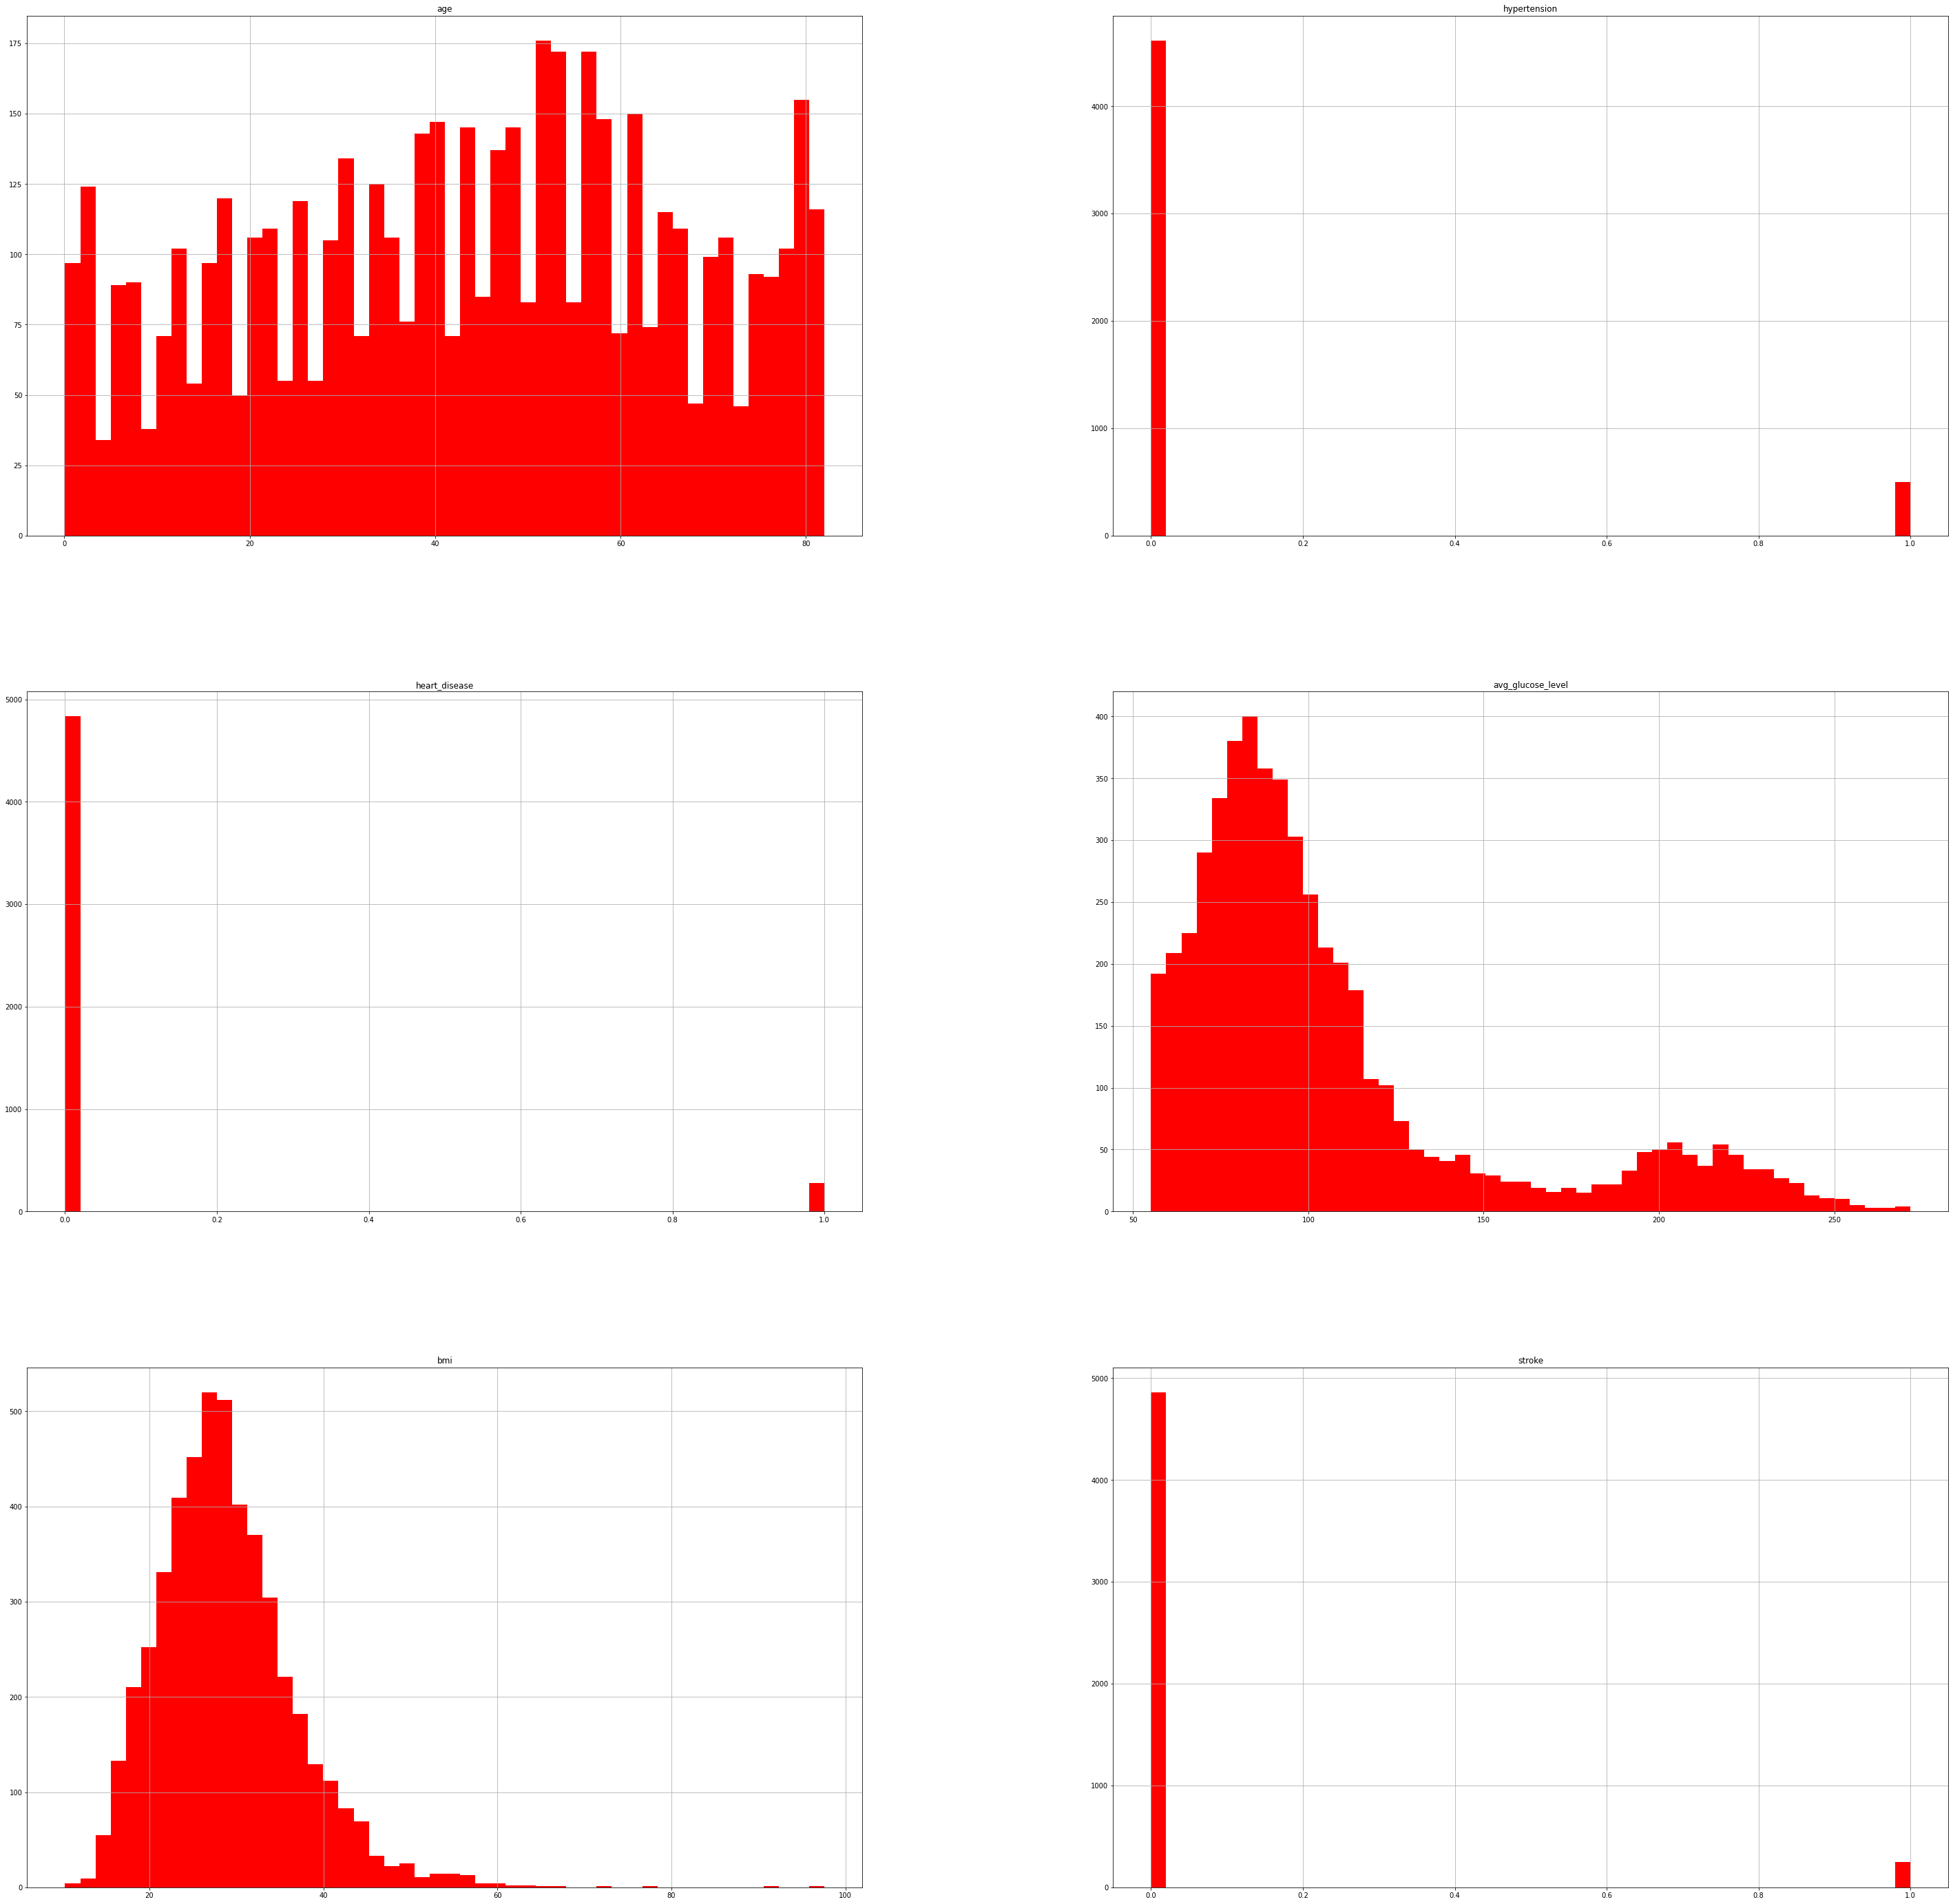

In [5]:
Stroke.hist(figsize=(50,50), bins=50, color="red");

In [6]:
Stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [7]:
Stroke.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [8]:
Stroke['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [9]:
print (Stroke[Stroke['gender'] == 'Other'].index.tolist())

[3116]


In [10]:
Stroke.drop([3116],inplace = True)

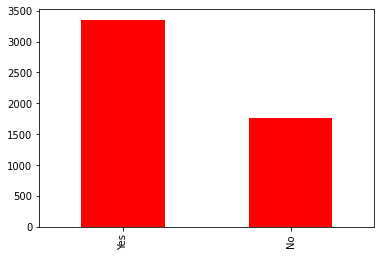

In [11]:
Stroke['ever_married'].value_counts().plot(kind='bar',color='red')

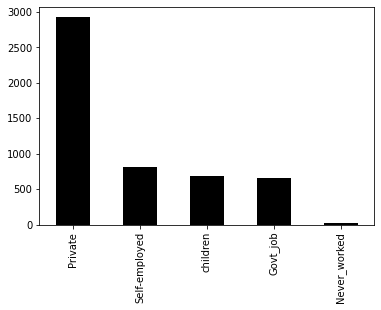

In [12]:
Stroke['work_type'].value_counts().plot(kind='bar',color='black')

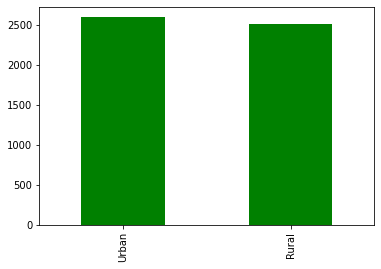

In [13]:
Stroke['Residence_type'].value_counts().plot(kind='bar',color='green')

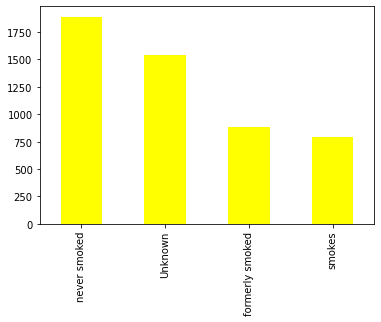

In [14]:
Stroke['smoking_status'].value_counts().plot(kind='bar',color='Yellow')

In [15]:
for label, content in Stroke.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            #Fill missing numeric valuees with median
            Stroke[label] = content.fillna(content.median())

In [16]:
Stroke.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5109 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5109 non-null   object 
 1   age                5109 non-null   float64
 2   hypertension       5109 non-null   int64  
 3   heart_disease      5109 non-null   int64  
 4   ever_married       5109 non-null   object 
 5   work_type          5109 non-null   object 
 6   Residence_type     5109 non-null   object 
 7   avg_glucose_level  5109 non-null   float64
 8   bmi                5109 non-null   float64
 9   smoking_status     5109 non-null   object 
 10  stroke             5109 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 479.0+ KB


In [17]:
Stroke['work_type'].value_counts()

Private          2924
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

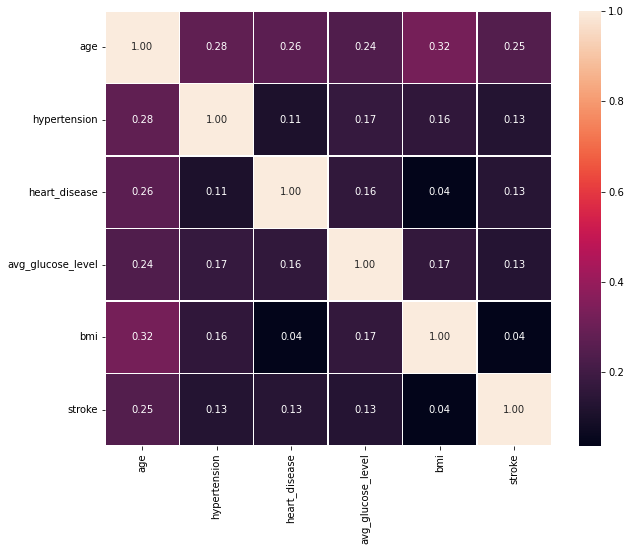

In [18]:
corr_matrix = Stroke.corr()
fig , ax = plt.subplots(figsize=(10,8))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt='.2f')

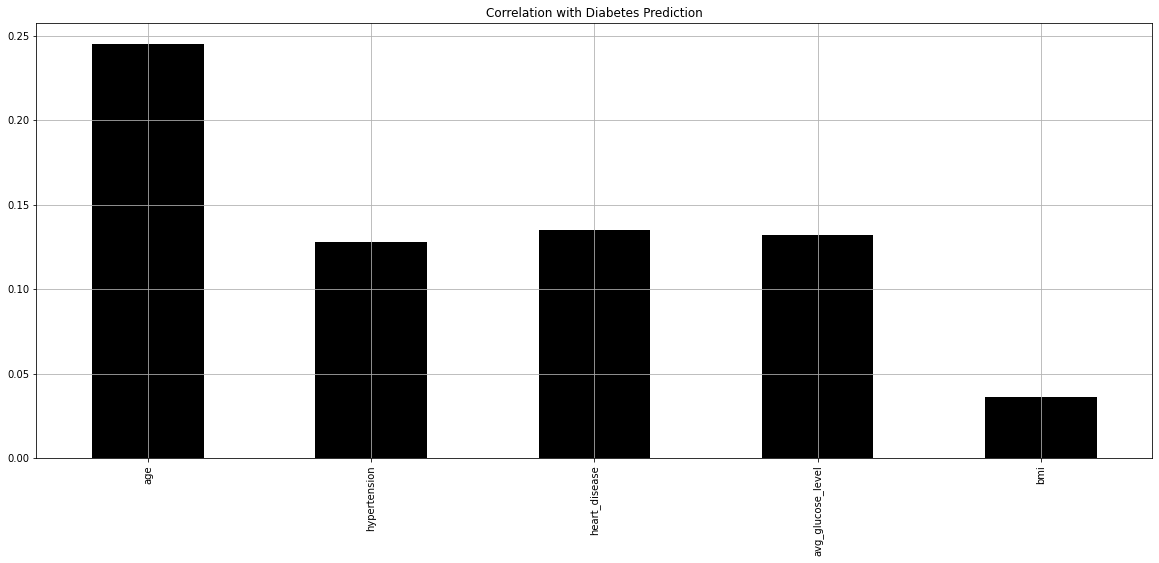

In [19]:
Stroke.drop('stroke', axis=1).corrwith(Stroke.stroke).plot(kind='bar', grid=True, figsize=(20, 8), title="Correlation with Diabetes Prediction",color="Black")

# Train Test Split

In [20]:
X= Stroke.drop('stroke',axis=1)
Y=Stroke['stroke']

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=42,stratify=Y)

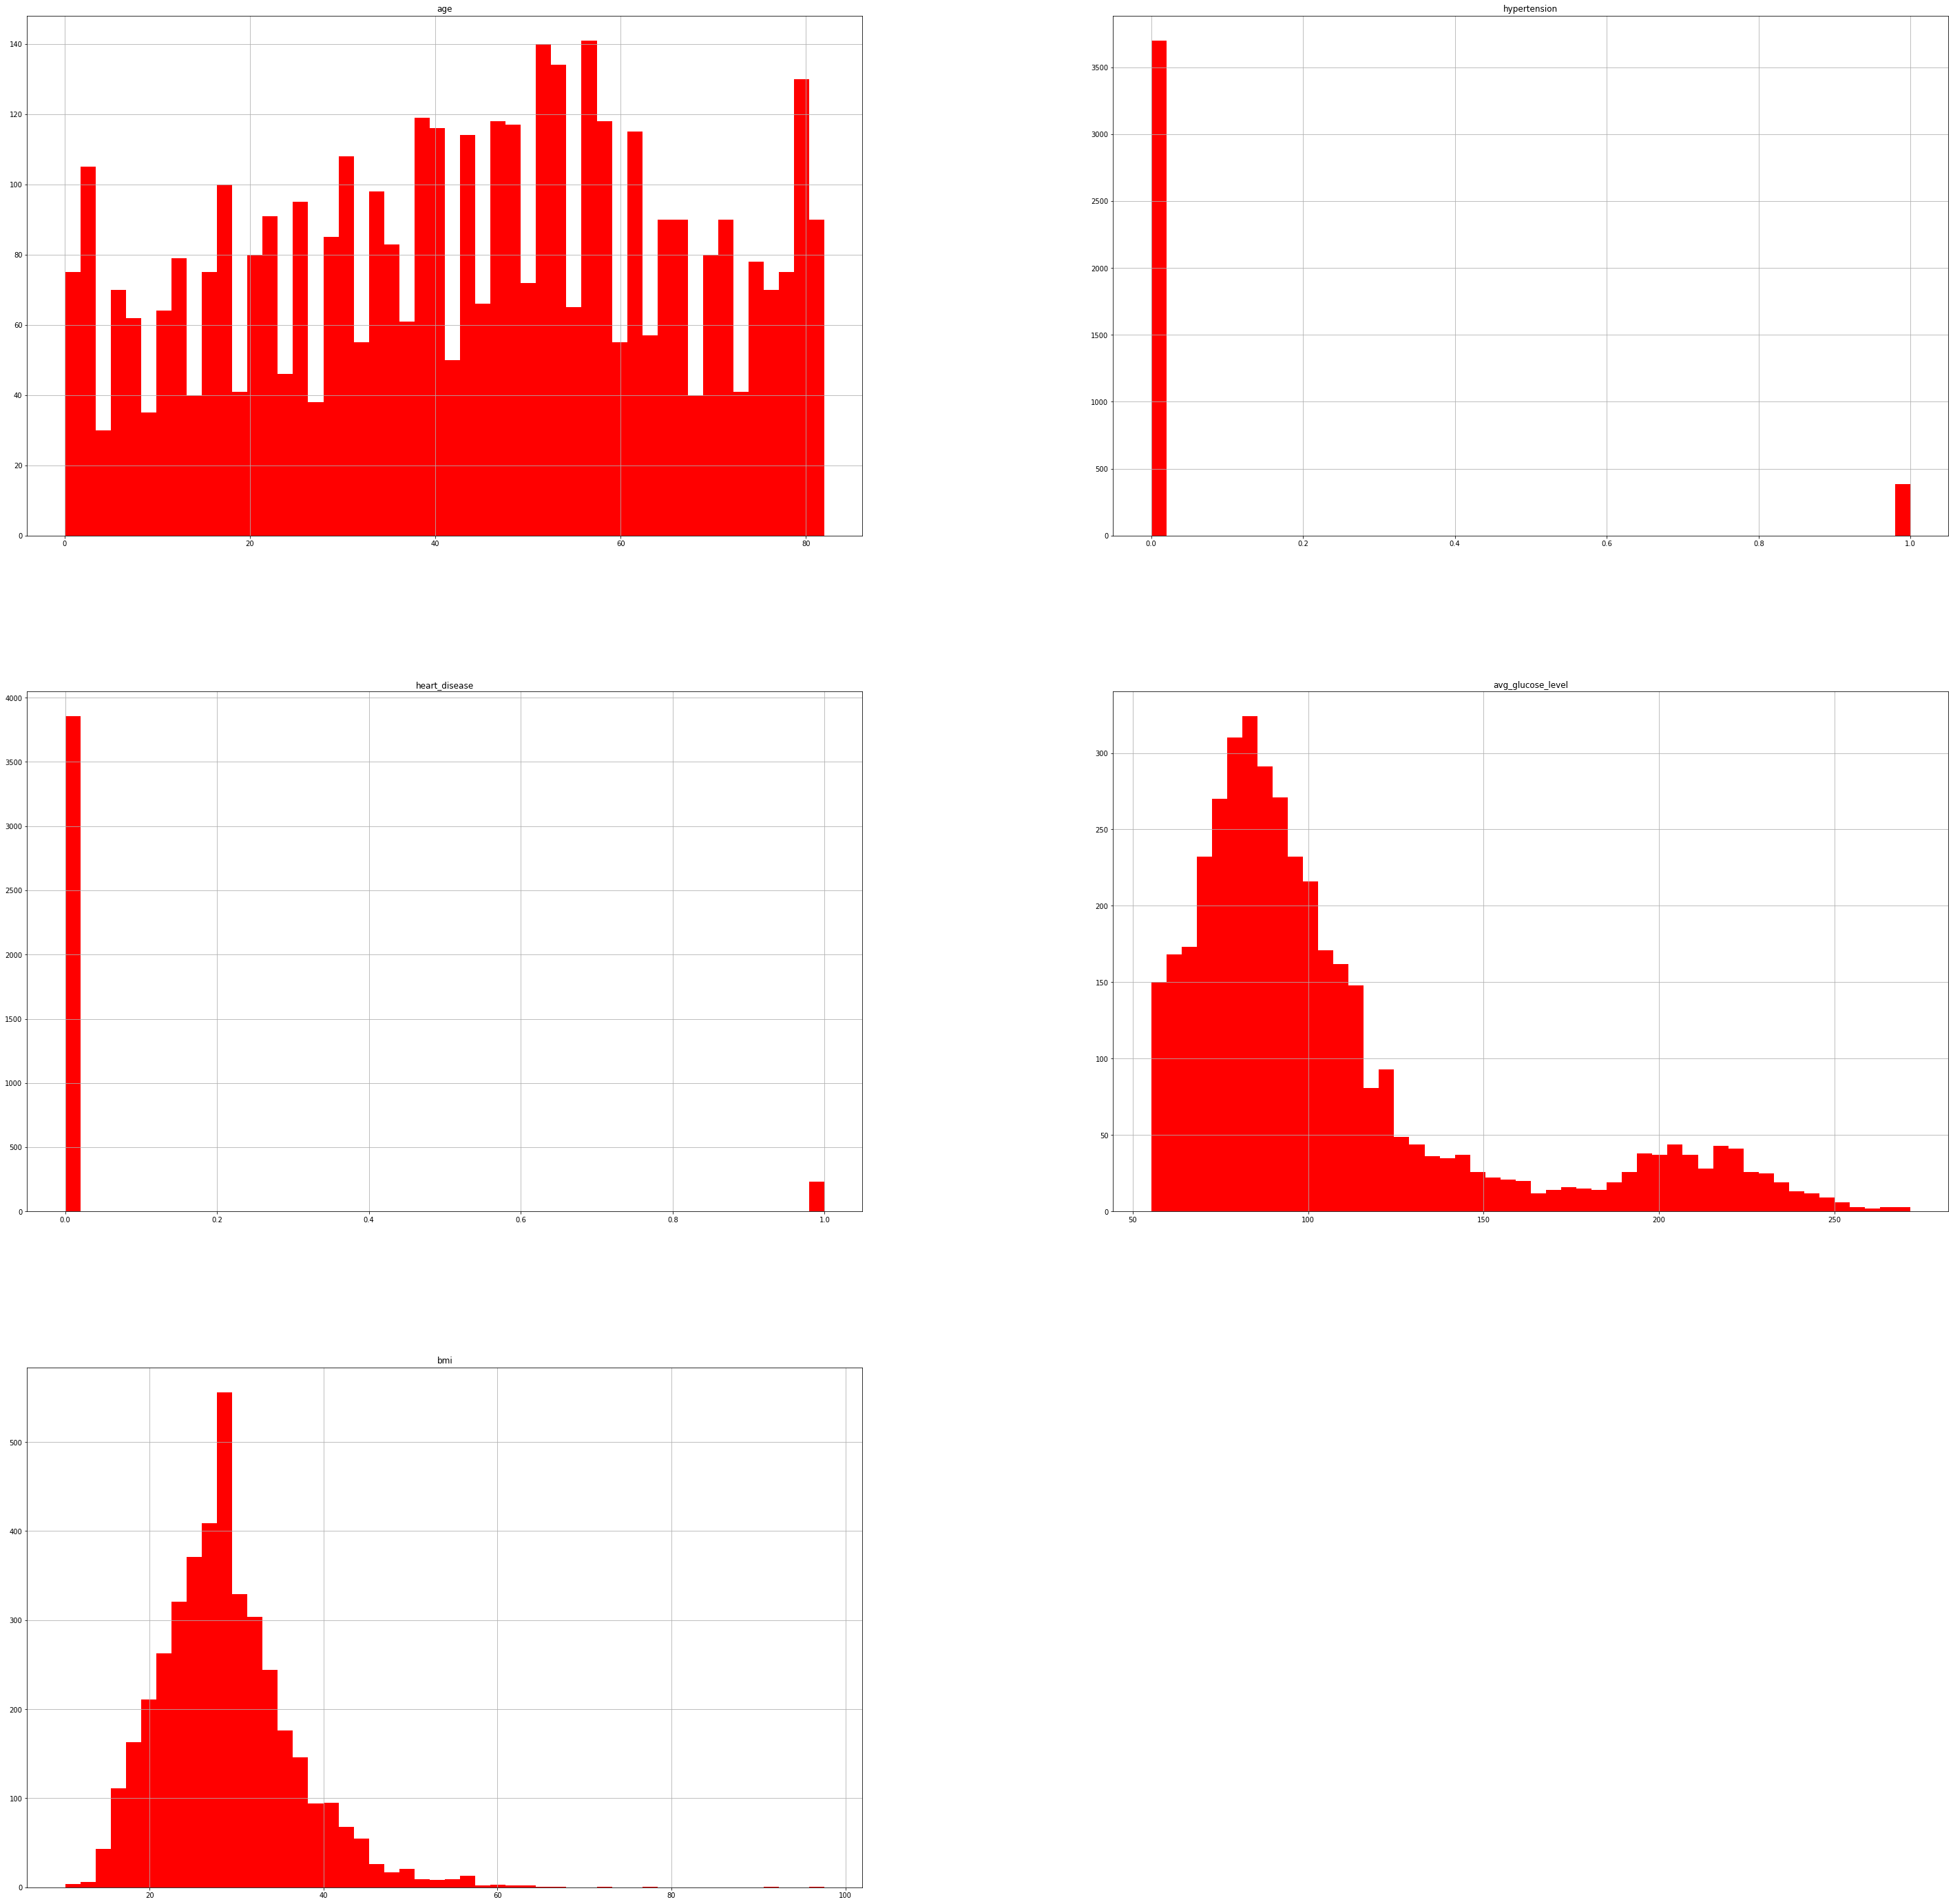

In [22]:
X_train.hist(figsize=(50,50), bins=50, color="red");

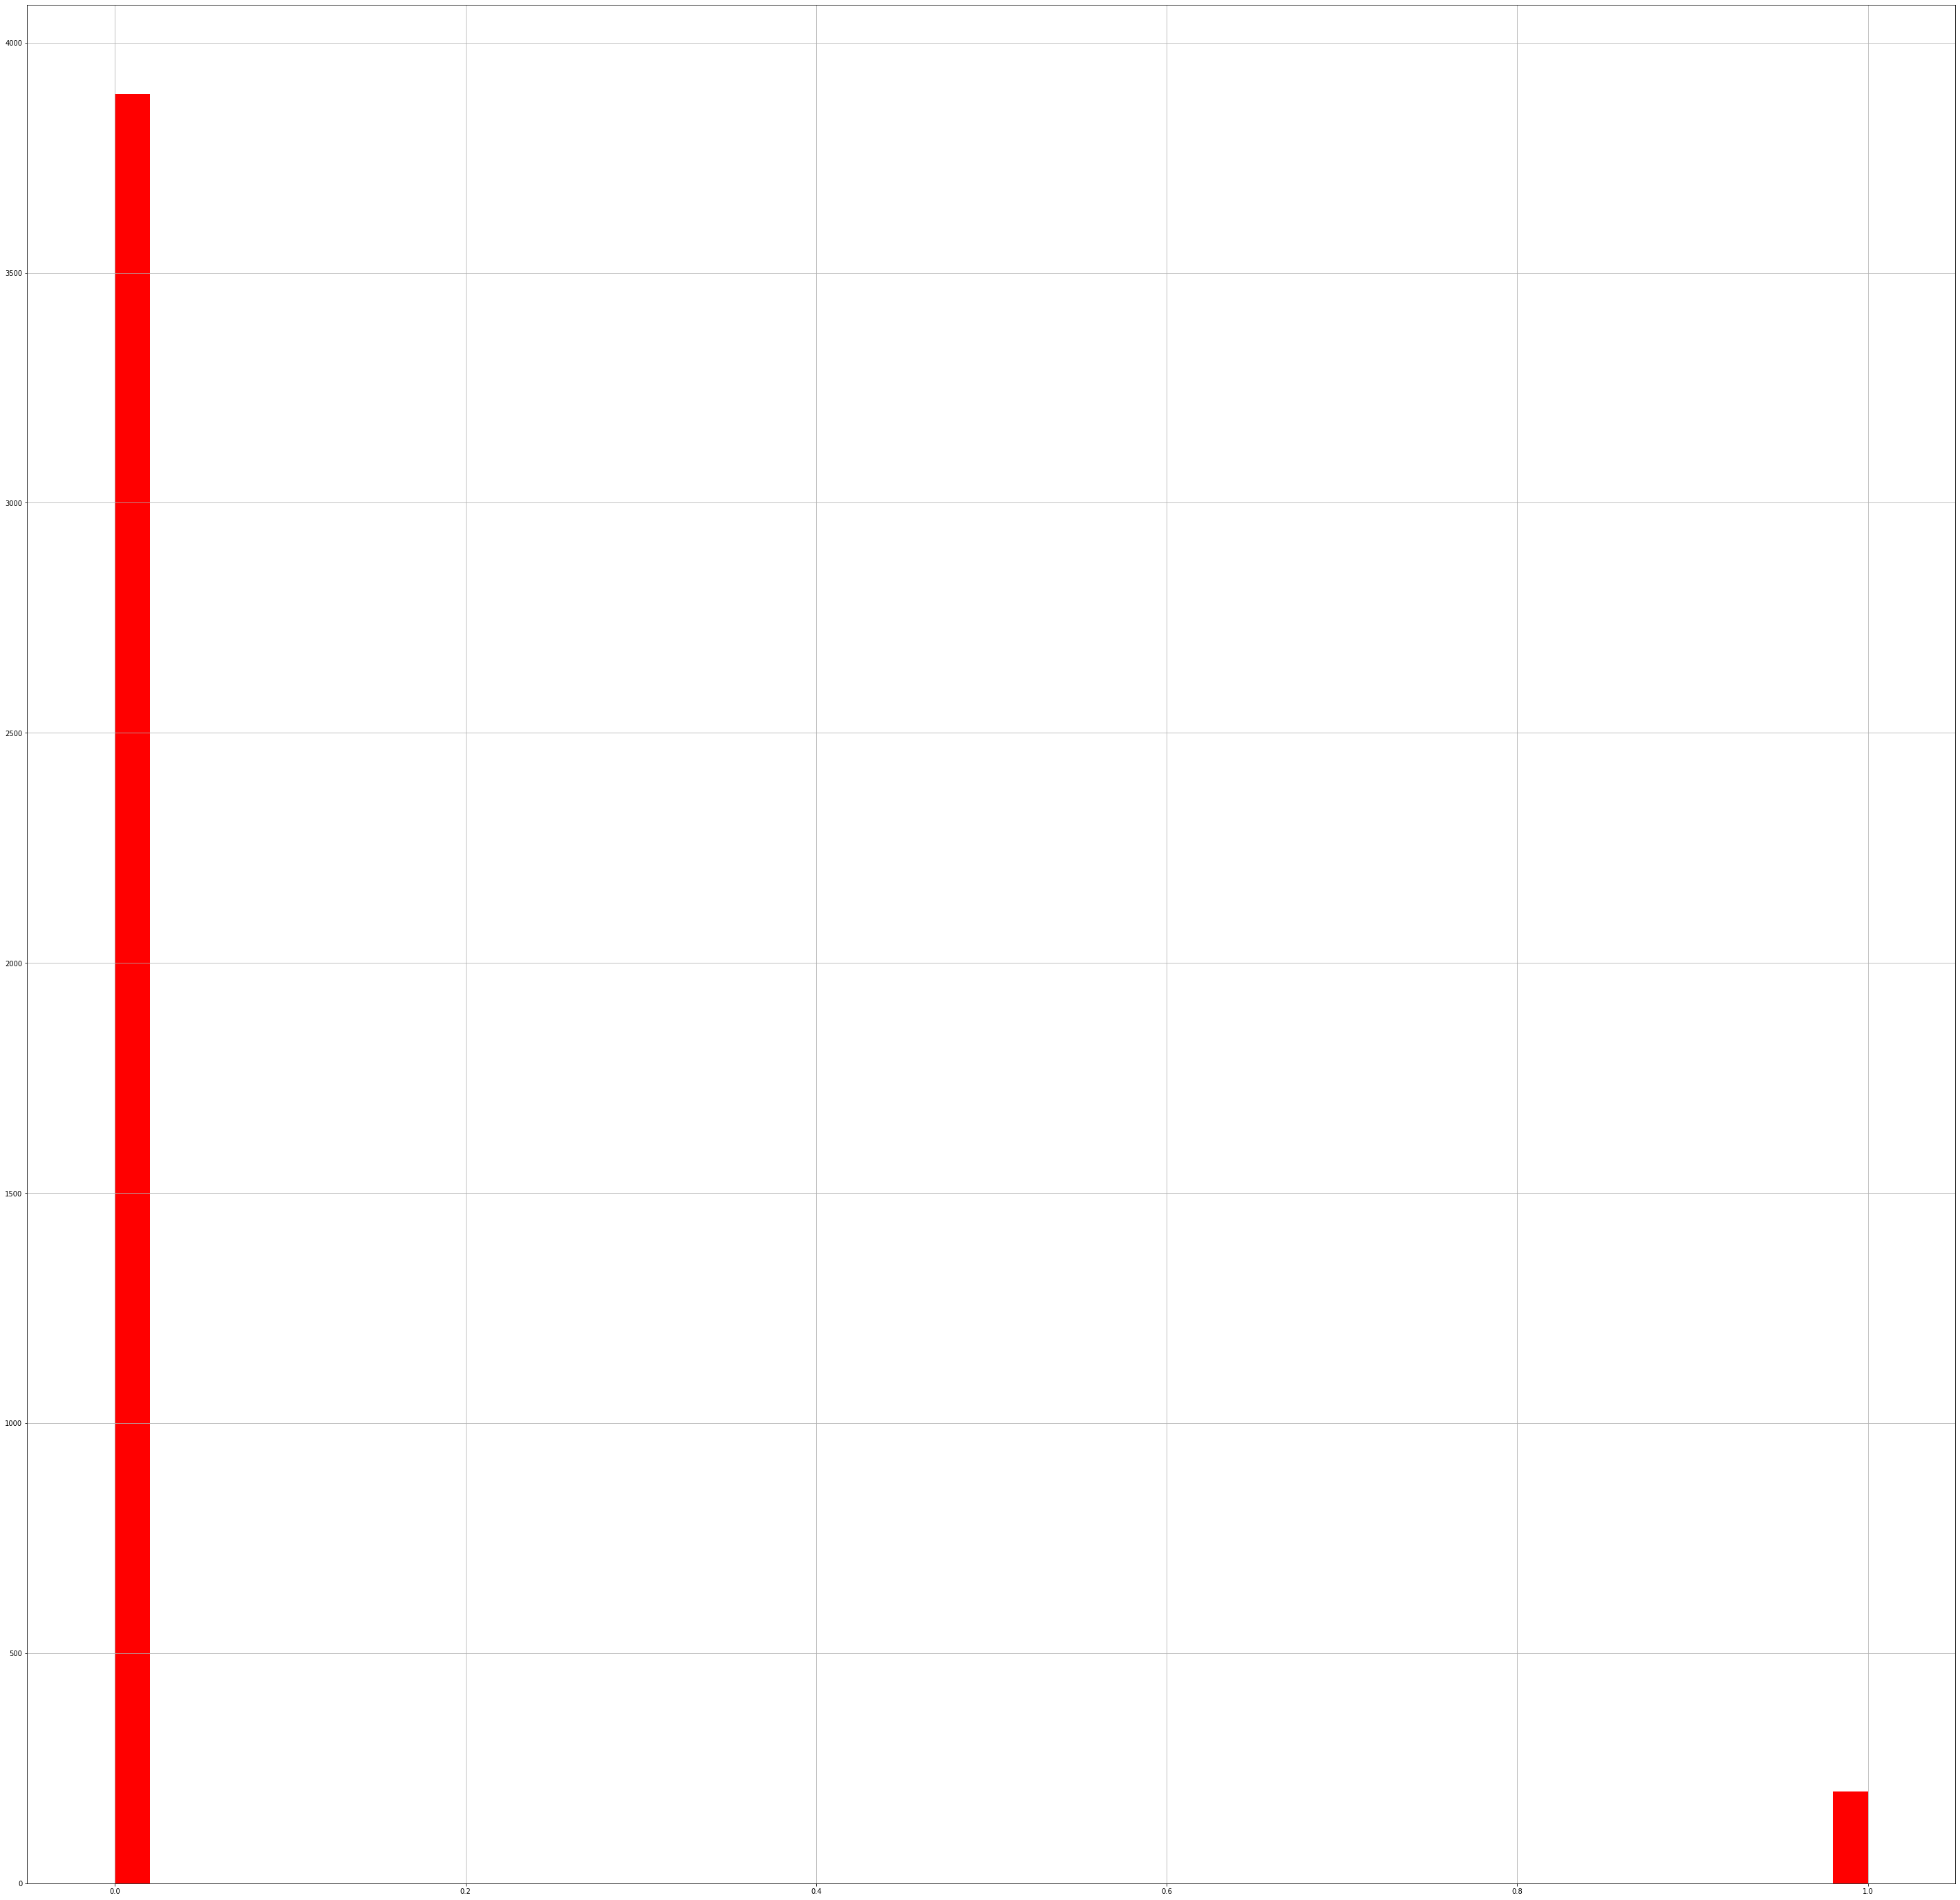

In [23]:
Y_train.hist(figsize=(50,50), bins=50, color="red")

In [24]:
Numeric = []
for label, content in Stroke.items():
    if pd.api.types.is_numeric_dtype(content):
      Numeric.append(label)

In [25]:
Numeric.remove('stroke')

In [26]:
Object = []
for label, content in Stroke.items():
    if not(pd.api.types.is_numeric_dtype(content)):
      Object.append(label)

In [27]:
Object

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

In [28]:
ct = make_column_transformer(
    (MinMaxScaler(), Numeric),
    (OneHotEncoder(handle_unknown='ignore'),Object))

In [29]:
ct.fit(X_train)

ColumnTransformer(transformers=[('minmaxscaler', MinMaxScaler(),
                                 ['age', 'hypertension', 'heart_disease',
                                  'avg_glucose_level', 'bmi']),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['gender', 'ever_married', 'work_type',
                                  'Residence_type', 'smoking_status'])])

In [30]:
X_train_ct = ct.transform(X_train)

In [31]:
X_test_ct = ct.transform(X_test)

In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV


param_grid = {
    "max_depth": [3, 4, 5, 7],
    "learning_rate": [0.1, 0.01, 0.05],
    "gamma": [0, 0.25, 1],
    "reg_lambda": [0, 1, 10],
    'booster': ['gbtree', 'gblinear'],
    "scale_pos_weight": [1, 3, 5],
    "subsample": [0.8],
    "colsample_bytree": [0.5],
}

# Init classifier
xgb_cl = xgb.XGBClassifier(subsample= 0.8,
 scale_pos_weight= 5,
 reg_lambda= 1,
 max_depth= 5,
 learning_rate= 0.01,
 gamma= 1,
 colsample_bytree= 0.5)

# Init Grid Search
grid_cv = GridSearchCV(xgb_cl, param_grid, n_jobs=-1, cv=3, scoring="accuracy",verbose=2)

# Fit
grid_cv.fit(X_train_ct, Y_train)

Fitting 3 folds for each of 648 candidates, totalling 1944 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(colsample_bytree=0.5, gamma=1,
                                     learning_rate=0.01, max_depth=5,
                                     scale_pos_weight=5, subsample=0.8),
             n_jobs=-1,
             param_grid={'booster': ['gbtree', 'gblinear'],
                         'colsample_bytree': [0.5], 'gamma': [0, 0.25, 1],
                         'learning_rate': [0.1, 0.01, 0.05],
                         'max_depth': [3, 4, 5, 7], 'reg_lambda': [0, 1, 10],
                         'scale_pos_weight': [1, 3, 5], 'subsample': [0.8]},
             scoring='accuracy', verbose=2)

In [ ]:
grid_cv.best_params_

{'booster': 'gbtree',
 'colsample_bytree': 0.5,
 'gamma': 0,
 'learning_rate': 0.01,
 'max_depth': 3,
 'reg_lambda': 0,
 'scale_pos_weight': 1,
 'subsample': 0.8}

In [ ]:
xgb_cl0 = xgb.XGBClassifier(subsample= 0.8,
 scale_pos_weight= 1,
 reg_lambda= 0,
 booster = 'gbtree',
 max_depth= 3,
 learning_rate= 0.01,
 gamma= 0,
 colsample_bytree= 0.5)

In [ ]:
xgb_cl0.fit(X_train_ct,Y_train)

XGBClassifier(colsample_bytree=0.5, learning_rate=0.01, reg_lambda=0,
              subsample=0.8)

In [ ]:
Y_pred=xgb_cl0.predict(X_test_ct)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_pred,Y_test)

0.9510763209393346

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_true=Y_test, y_pred=Y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.00      0.00      0.00        50

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.90      0.95      0.93      1022



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


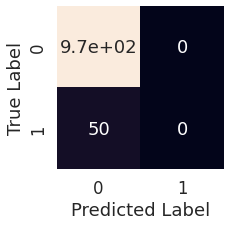

In [ ]:
from sklearn.metrics import confusion_matrix
sns.set(font_scale=1.5)
def plot_confusion(y_test,y_preds):
    #Creating Heatmap of Confusion matrix"
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test,y_preds),
                    annot=True,
                    cbar=False)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")

plot_confusion(Y_test,Y_pred)

In [ ]:
%%time
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

#Different HyperParameters
rf_grid = {"n_estimators": np.arange(10,100,10),
          "max_depth": [None,3,5,10],
          "min_samples_split":np.arange(2,10,2),
          "min_samples_leaf":np.arange(1,10,2),
          "max_features":[0.5,1,"sqrt",'log2']}

#Instatantiate Randomised Search CV
rs_model = RandomizedSearchCV(RandomForestClassifier(n_jobs=-1,random_state=42),
                             param_distributions=rf_grid,
                             cv=5,
                             verbose=2,
                             n_iter=1000,
                        return_train_score=True)
rs_model.fit(X_train_ct,Y_train)

Streaming output truncated to the last 5000 lines.
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=9, min_samples_split=2, n_estimators=10; total time=   0.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=9, min_samples_split=2, n_estimators=10; total time=   0.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=9, min_samples_split=2, n_estimators=10; total time=   0.1s
[CV] END max_depth=3, max_features=log2, min_samples_leaf=7, min_samples_split=8, n_estimators=40; total time=   0.2s
[CV] END max_depth=3, max_features=log2, min_samples_leaf=7, min_samples_split=8, n_estimators=40; total time=   0.2s
[CV] END max_depth=3, max_features=log2, min_samples_leaf=7, min_samples_split=8, n_estimators=40; total time=   0.2s
[CV] END max_depth=3, max_features=log2, min_samples_leaf=7, min_samples_split=8, n_estimators=40; total time=   0.2s
[CV] END max_depth=3, max_features=log2, min_samples_leaf=7, min_samples_split=8, n_estimators=40; total time=   0.2s
[CV] 

RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
                   n_iter=1000,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': array([1, 3, 5, 7, 9]),
                                        'min_samples_split': array([2, 4, 6, 8]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   return_train_score=True, verbose=2)

In [ ]:
rs_model.best_params_

{'n_estimators': 10,
 'min_samples_split': 6,
 'min_samples_leaf': 9,
 'max_features': 0.5,
 'max_depth': None}

In [ ]:
RF1 = RandomForestClassifier(n_jobs=-1,random_state=42,n_estimators= 10,
 min_samples_split= 6,
 min_samples_leaf= 9,
 max_features= 0.5,
 max_depth =None)

In [ ]:
RF1.fit(X_train_ct, Y_train)

RandomForestClassifier(max_features=0.5, min_samples_leaf=9,
                       min_samples_split=6, n_estimators=10, n_jobs=-1,
                       random_state=42)

In [ ]:
Y_preds_RF=RF1.predict(X_test_ct)

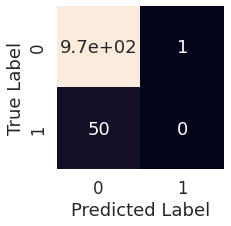

In [ ]:
plot_confusion(Y_test,Y_preds_RF)

In [ ]:
from sklearn.model_selection import cross_val_predict

Y_scores = cross_val_predict(RF1, X_train_ct, Y_train, cv=3, method='predict_proba')

In [ ]:
Y_scores_Forest = Y_scores[:,1]
len(Y_scores_Forest), len(Y_train)

(4087, 4087)

In [ ]:
from sklearn.metrics import roc_curve
fpr_forest, tpr_forest, thresholds_forest = roc_curve(Y_train,Y_scores_Forest)

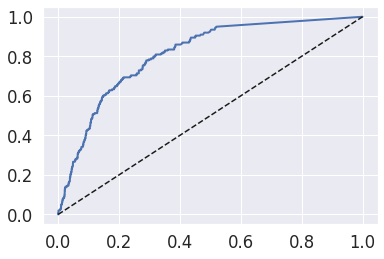

In [ ]:
def plot_roc_curve(fpr, tpr, label=None):
  plt.plot(fpr,tpr,linewidth=2,label=label)
  plt.plot([0,1],[0,1],'k--')

plot_roc_curve(fpr_forest,tpr_forest)

In [ ]:
print(classification_report(y_true=Y_test, y_pred=Y_preds_RF))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.00      0.00      0.00        50

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.90      0.95      0.93      1022



In [32]:
import tensorflow as tf
# Set Random seed
tf.random.set_seed(42)

#1. Create the Model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

#2. Compile the Model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

#3. Fit the Model
history = model_3.fit(X_train_ct,Y_train,epochs=100)

Epoch 1/100
128/128 [==============================] - 4s 3ms/step - loss: 0.2396 - accuracy: 0.9396
Epoch 2/100
128/128 [==============================] - 0s 3ms/step - loss: 0.1774 - accuracy: 0.9513
Epoch 3/100
128/128 [==============================] - 0s 3ms/step - loss: 0.1688 - accuracy: 0.9513
Epoch 4/100
128/128 [==============================] - 0s 3ms/step - loss: 0.1645 - accuracy: 0.9513
Epoch 5/100
128/128 [==============================] - 0s 3ms/step - loss: 0.1619 - accuracy: 0.9513
Epoch 6/100
128/128 [==============================] - 0s 3ms/step - loss: 0.1593 - accuracy: 0.9513
Epoch 7/100
128/128 [==============================] - 0s 3ms/step - loss: 0.1569 - accuracy: 0.9513
Epoch 8/100
128/128 [==============================] - 0s 3ms/step - loss: 0.1557 - accuracy: 0.9513
Epoch 9/100
128/128 [==============================] - 0s 3ms/step - loss: 0.1540 - accuracy: 0.9513
Epoch 10/100
128/128 [==============================] - 0s 3ms/step - loss: 0.1537 - accura

In [33]:
tf_pred = model_3.predict(X_test_ct)

In [34]:
tf_pred

array([[1.6956686e-04],
       [4.2174859e-03],
       [8.6828573e-03],
       ...,
       [2.3734510e-02],
       [1.2026209e-08],
       [2.3415245e-03]], dtype=float32)

In [35]:
Y_preds_round=tf.round(tf_pred)

In [37]:
from sklearn.metrics import confusion_matrix
sns.set(font_scale=1.5)
def plot_confusion(y_test,y_preds):
    #Creating Heatmap of Confusion matrix"
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test,y_preds),
                    annot=True,
                    cbar=False)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")

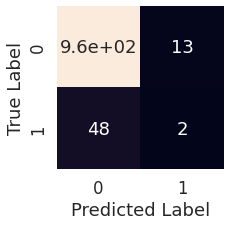

In [38]:
plot_confusion(Y_test,Y_preds_round)

In [40]:
import tensorflow as tf
# Set Random seed
tf.random.set_seed(42)

#1. Create the Model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

#2. Compile the Model
model_4.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

#3. Fit the Model
history1 = model_4.fit(X_train_ct,Y_train,epochs=400)

Epoch 1/400
128/128 [==============================] - 1s 3ms/step - loss: 0.2143 - accuracy: 0.9511
Epoch 2/400
128/128 [==============================] - 0s 3ms/step - loss: 0.1739 - accuracy: 0.9513
Epoch 3/400
128/128 [==============================] - 0s 3ms/step - loss: 0.1657 - accuracy: 0.9513
Epoch 4/400
128/128 [==============================] - 0s 3ms/step - loss: 0.1615 - accuracy: 0.9513
Epoch 5/400
128/128 [==============================] - 0s 3ms/step - loss: 0.1603 - accuracy: 0.9513
Epoch 6/400
128/128 [==============================] - 0s 3ms/step - loss: 0.1568 - accuracy: 0.9513
Epoch 7/400
128/128 [==============================] - 0s 3ms/step - loss: 0.1550 - accuracy: 0.9513
Epoch 8/400
128/128 [==============================] - 0s 3ms/step - loss: 0.1538 - accuracy: 0.9513
Epoch 9/400
128/128 [==============================] - 0s 3ms/step - loss: 0.1518 - accuracy: 0.9513
Epoch 10/400
128/128 [==============================] - 0s 3ms/step - loss: 0.1513 - accura

In [42]:
tf_preds2 = model_4.predict(X_test_ct)

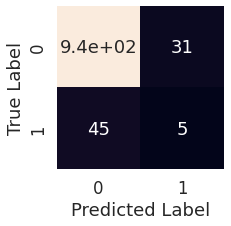

In [43]:
tf_preds_round2 = tf.round(tf_preds2)
plot_confusion(Y_test,tf_preds_round2)

In [44]:
from joblib import dump

#Save Model to File
dump(model_4, filename="Stroke_Model.joblib")

['Stroke_Model.joblib']